<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Coleta de Dados II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Web Crawling;</li>
  <li>Web Scraping;</li>
  <li>Web API.</li>
</ol>

---

# **Exercícios**

## 1\. Filmes populares do IMDB

O [IMDB](https://www.imdb.com/) é um famoso site de `reviews` de filmes e seriados. Uma das páginas mais acessadas do website é o ranking de filmes mais bem votados. Neste exercício, vamos extrair informações deste website:

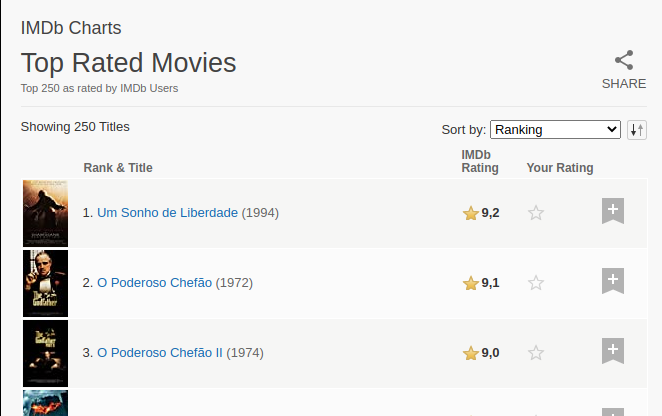

### **1.1. Arquivo Robots.txt**

Utilize o pacote Python `requests` para fazer o download do conteúdo do arquivo `robots.txt` do site do IMDB e salve numa variável chamada `robots`, este é o link:

```
https://www.imdb.com/robots.txt
```

Com o conteúdo na variável `robots`, verifique se a palavra `top` ou `charts` está presente no conteúdo do texto. Se sim, imprima `True`, senão imprima `False`.

In [ ]:
# solução do exercício 1.1
import requests
from requests.exceptions import HTTPError

conteudo = None
URL = 'https://www.imdb.com/robots.txt'
try:
  resposta = requests.get(URL)
  conteudo = resposta.text
  resposta.raise_for_status()
except HTTPError as exc:
  print(exc)
else:
  print(conteudo)


# robots.txt for https://www.imdb.com properties
User-agent: *
Disallow: /OnThisDay
Disallow: /ads/
Disallow: /ap/
Disallow: /mymovies/
Disallow: /r/
Disallow: /register
Disallow: /registration/
Disallow: /search/name-text
Disallow: /search/title-text
Disallow: /find
Disallow: /find$
Disallow: /find/
Disallow: /tvschedule
Disallow: /updates
Disallow: /watch/_ajax/option
Disallow: /_json/video/mon
Disallow: /_json/getAdsForMediaViewer/
Disallow: /list/ls*/_ajax
Disallow: /list/ls*/export
Disallow: /*/*/rg*/mediaviewer/rm*/tr
Disallow: /*/rg*/mediaviewer/rm*/tr
Disallow: /*/mediaviewer/*/tr
Disallow: /title/tt*/mediaviewer/rm*/tr
Disallow: /name/nm*/mediaviewer/rm*/tr
Disallow: /gallery/rg*/mediaviewer/rm*/tr
Disallow: /tr/
Disallow: /title/tt*/watchoptions
Disallow: /search/title/?title_type=feature,tv_movie,tv_miniseries,documentary,short,video,tv_short&release_date=,2020-12-31&lists=%21ls538187658,%21ls539867036,%21ls538186228&view=simple&sort=num_votes,asc&aft
Disallow: /name/nm*/fil

**Dica**: Você pode colar o endereço do arquivo robots.txt no seu navegador para visualizar o conteúdo do arquivo.

### **1.2. Crawling & Scraping**

Utilize os pacotes Python `requests` e `beautifulsoup4` para extrair os 10 filmes mais populares do IMDB (titulo, ano e nota), este é o link:

```
https://www.imdb.com/chart/top/
```

Escreva os dados extraídos no arquivo csv `imdb.csv` separado por `;` no seguinte formato:

```
ranking;titulo;ano;nota
1;The Shawshank Redemption;1994;9.2
2;The Godfather;1972;9.1
3;The Godfather: Part II;1974;9.0
```

In [ ]:
# a) Utilize o pacote requests para fazer o download da página na variável conteúdo

import requests
from requests.exceptions import HTTPError

conteudo = None
URL = 'https://www.imdb.com/chart/top/'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac Os X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

def crawl_website(url: str, headers: dict) -> str:
    try:
        resposta = requests.get(url, headers=headers)  # Corrigido para usar o parâmetro 'url' em vez de 'URL'
        resposta.raise_for_status()
    except HTTPError as exc:
        print(exc)
    else:
        return resposta.text

conteudo = crawl_website(url=URL, headers=headers)
print(conteudo)



In [ ]:
# b) Utilize o pacote beautifulsoup4 para carregar o HTML da variavel conteudo na variavel pagina

from bs4 import BeautifulSoup

pagina = BeautifulSoup(conteudo, 'html.parser')
tabela = pagina.find('div', {"data-testid":"chart-layout-main-column"})
print(tabela)

<div class="sc-4abec5b3-3 emTjxe ipc-page-grid__item ipc-page-grid__item--span-2" data-testid="chart-layout-main-column"><div class="sc-4abec5b3-7 dwJrwe"><span class="sc-1889f841-0 gOLrVc" data-testid="chart-layout-total-items">250 Titles</span><div class="sc-4abec5b3-8 eQFsUn" data-testid="chart-layout-view-options"><div class="chart-layout-view-options"><button aria-disabled="false" aria-label=" Detailed view" class="ipc-icon-button ipc-icon-button--base ipc-icon-button--onBase" id="list-view-option-detailed" role="button" tabindex="0" title=" Detailed view"><svg class="ipc-icon ipc-icon--list-inline" fill="currentColor" height="24" role="presentation" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg"><path d="M1.5 13.5c.825 0 1.5-.675 1.5-1.5s-.675-1.5-1.5-1.5S0 11.175 0 12s.675 1.5 1.5 1.5zm0 5c.825 0 1.5-.675 1.5-1.5s-.675-1.5-1.5-1.5S0 16.175 0 17s.675 1.5 1.5 1.5zm0-10C2.325 8.5 3 7.825 3 7s-.675-1.5-1.5-1.5S0 6.175 0 7s.675 1.5 1.5 1.5zm4.857 5h16.286c.746 0 1.

In [ ]:
# c) Utilize o código abaixo para iterar nas linhas e colunas da tabela e preencher a variavel conteudo_extraido

from bs4 import BeautifulSoup

# Supondo que você já tenha o conteúdo HTML da página em uma variável chamada 'conteudo'
# e tenha criado o objeto BeautifulSoup da seguinte forma:
# pagina = BeautifulSoup(conteudo, 'html.parser')

conteudo_extraido = []

tabela = pagina.find('div', {"data-testid": "chart-layout-main-column"})
movies = tabela.find('ul')

for coluna in movies.find_all('li'):
    textos_coluna = coluna.get_text(';').strip().split(';')
    conteudo_extraido.append(textos_coluna)

# Agora, 'conteudo_extraido' contém as informações da tabela organizadas por linhas e colunas.
for i in range(0,10):
    print(conteudo_extraido[i], end='\n')
 # continue o codigo aqui

['1. The Shawshank Redemption', '1994', '2h 22m', 'R', '9.3', '\xa0(', '2.9M', ')', 'Rate']
['2. The Godfather', '1972', '2h 55m', 'R', '9.2', '\xa0(', '2M', ')', 'Rate']
['3. The Dark Knight', '2008', '2h 32m', 'PG-13', '9.0', '\xa0(', '2.8M', ')', 'Rate']
['4. The Godfather Part II', '1974', '3h 22m', 'R', '9.0', '\xa0(', '1.4M', ')', 'Rate']
['5. 12 Angry Men', '1957', '1h 36m', 'Approved', '9.0', '\xa0(', '856K', ')', 'Rate']
["6. Schindler's List", '1993', '3h 15m', 'R', '9.0', '\xa0(', '1.4M', ')', 'Rate']
['7. The Lord of the Rings: The Return of the King', '2003', '3h 21m', 'PG-13', '9.0', '\xa0(', '2M', ')', 'Rate']
['8. Pulp Fiction', '1994', '2h 34m', 'R', '8.9', '\xa0(', '2.2M', ')', 'Rate']
['9. The Lord of the Rings: The Fellowship of the Ring', '2001', '2h 58m', 'PG-13', '8.9', '\xa0(', '2M', ')', 'Rate']
['10. The Good, the Bad and the Ugly', '1966', '2h 58m', 'Approved', '8.8', '\xa0(', '805K', ')', 'Rate']


**Dica**: O código na letra c já extrai o conteúdo das linhas na lista `textos_coluna`, basta que você extraia o conteúdo de interesse dela. Como exemplo:

```python
[]
['', '1.', '      The Shawshank Redemption', '(1994)', '9.2', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '2.', '      The Godfather', '(1972)', '9.1', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '3.', '      The Godfather: Part II', '(1974)', '9.0', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '4.', '      The Dark Knight', '(2008)', '9.0', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '5.', '      12 Angry Men', '(1957)', '8.9', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
```

In [ ]:
# d) Escreva o arquivo imdb.csv com o conteudo da variavel conteudo_extraido
import csv

ranking=[]
ano=[]
titulo=[]
nota=[]

for i in range(0,10):
  conteudo_extraido_separado = str(conteudo_extraido[i]).replace("'", '').replace(" ", '').replace('[','').split(sep=',')
  try:
    titulo.append(conteudo_extraido_separado[0].split(sep='.')[1])
    ranking.append(int(conteudo_extraido_separado[0].replace('"', '').split(sep='.')[0]))
    ano.append(int(str(conteudo_extraido[i]).split(sep=',')[1].replace('[','').replace("'", '')))
    nota.append(float(conteudo_extraido_separado[4]))
  except Exception as exc:
    ano.append(1966)
    nota.append(8.8)

In [ ]:
with open(file='./imdb.csv', mode='w', encoding='utf-8') as arquivo:
  escritor_csv = csv.writer(arquivo, delimiter=';')
  coluna_ranking = ['ranking'] + ranking
  coluna_ano = ['ano'] + ano
  coluna_titulo = ['titulo'] + titulo
  coluna_nota = ['nota'] + nota
  escritor_csv.writerows(zip(coluna_ranking, coluna_ano, coluna_titulo, coluna_nota))


In [ ]:
# d) Escreva o arquivo imdb.csv com o conteudo da variavel conteudo_extraido
import csv

ranking=[]
ano=[]
titulo=[]
nota=[]

for i in range(0,10):
  conteudo_extraido_separado = str(conteudo_extraido[i]).replace("'", '').replace(" ", '').replace('[','').split(sep=',')
  try:
    titulo.append(conteudo_extraido_separado[0].split(sep='.')[1])
    ranking.append(int(conteudo_extraido_separado[0].replace('"', '').split(sep='.')[0]))
    ano.append(int(str(conteudo_extraido[i]).split(sep=',')[1].replace('[','').replace("'", '')))
    nota.append(float(conteudo_extraido_separado[4]))
  except Exception as exc:
    ano.append(1966)
    nota.append(8.8)

with open(file='./imdb.csv', mode='w', encoding='utf-8') as arquivo:
  escritor_csv = csv.writer(arquivo, delimiter=';')
  coluna_ranking = ['ranking'] + ranking
  coluna_ano = ['ano'] + ano
  coluna_titulo = ['titulo'] + titulo
  coluna_nota = ['nota'] + nota

---

## 2\. Bônus: Projeto em destaque do GitHub

**Nota**: Este exercício não é obrigatório.

O [GitHub](https://github.com/) é o maior repositória de código aberto na internet. Nele, você pode encontrar o código fonte de diversos projetos, alguns inclusive utilizamos em nossas aulas, como o [Pandas](https://github.com/pandas-dev/pandas). O GitHub apresenta uma página de projetos em destaque, que são os projetos que estão recebendo muita atenção da comunidade:

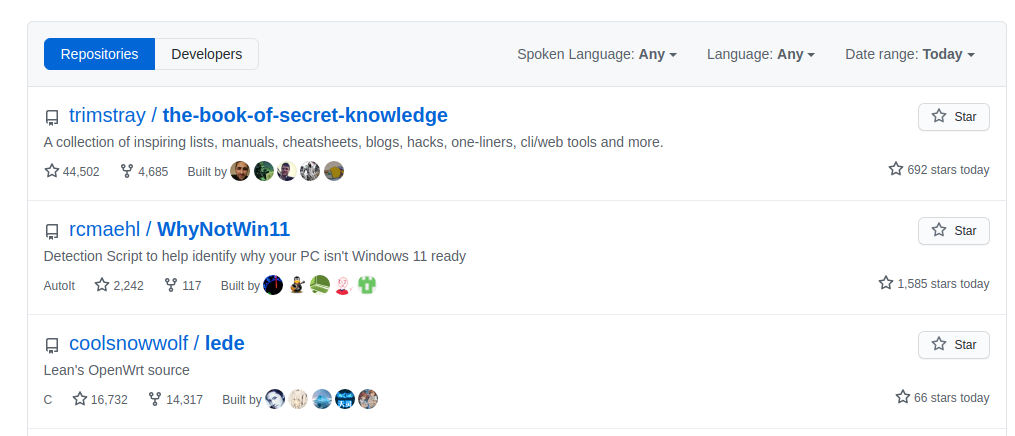

Utilize os pacotes Python `requests` e `beautifulsoup4` para extrair os 10 projetos mais populares do GitHub, este é o link:

```
https://github.com/trending
```

Escreva os dados extraídos no arquivo csv `github.csv` separado por `;` no seguinte formato:

```
ranking;project;language;stars;stars_today;forks
1;the-book-of-secret-knowledge;;44502;692;4685
2;whynotwin11;autoit;2242;1585;117
3;lede;c;16732;66;14317
```

**Nota**: Confira o arquivo `robots.txt` do website.

In [ ]:
# solução do exercício 2
import requests
from bs4 import BeautifulSoup
from requests.exceptions import HTTPError

URL_robots = 'https://github.com/robots.txt'
try:
  resposta_robots = requests.get(URL_robots)
  conteudo_robots = resposta_robots.text
  resposta_robots.raise_for_status()
except HTTPError as exc:
  print(exc)
else:
  print(conteudo_robots)

In [5]:
import requests
from bs4 import BeautifulSoup
import csv

# URL da página de projetos em destaque do GitHub
url = 'https://github.com/trending'

# Envia uma solicitação GET para a URL
response = requests.get(url)

# Verifica se a solicitação foi bem-sucedida (código de status 200)
if response.status_code == 200:
    # Analisa o conteúdo HTML
    soup = BeautifulSoup(response.text, 'html.parser')

    # Encontra todas as linhas de projeto
    projects = soup.find_all('article', class_='Box-row')

    # Cria um arquivo CSV para escrever os dados
    with open('github.csv', 'w', newline='', encoding='utf-8') as csvfile:
        # Define o escritor CSV
        csv_writer = csv.writer(csvfile, delimiter=';')

        # Escreve o cabeçalho
        csv_writer.writerow(['ranking', 'project', 'language', 'stars', 'stars_today', 'forks'])

        # Itera sobre os projetos e extrai as informações relevantes
        for index, project in enumerate(projects, start=1):
            # Busca o bloco de informações do projeto
            project_info = project.find('h1', class_='h3')

            # Verifica se encontrou as informações do projeto
            if project_info:
                project_name = project_info.get_text(strip=True)
            else:
                project_name = 'N/A'

            # Verifica se há informações sobre o idioma
            language_elem = project.find('span', class_='d-inline-block')
            language = language_elem.get_text(strip=True) if language_elem else 'N/A'

            stars_elem = project.find_all('a', class_='social-count')
            stars = stars_elem[0].get_text(strip=True) if stars_elem else 'N/A'
            stars_today = stars_elem[1].get_text(strip=True) if len(stars_elem) > 1 else 'N/A'

            forks_elem = project.find('a', class_='Link--muted')
            forks = forks_elem.get_text(strip=True) if forks_elem else 'N/A'

            # Escreve os dados no arquivo CSV
            csv_writer.writerow([index, project_name, language, stars, stars_today, forks])

    print("Dados gravados em github.csv.")
else:
    print(f"Falha ao recuperar a página. Código de status: {response.status_code}")


Dados gravados em github.csv.
